In [341]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from pandas.plotting import lag_plot
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


## World Bank: GDP from 1981-2020

I want to use GDP data from World Bank between 1981 and 2020 to predict data for 2021, 2022 and 2022.


I will first check what is the best method to do that, so I am taking the world GDP data to try out different models.

I am using Time Series statistical models (AR and ARIMA), as well as traditional ML models of Regression.

In [342]:
wb_gdp = pd.read_csv(r'C:\Users\luana\Ironhack DA\Unit 9\final_bootcamp_project\csv_files\wb_gdp_clean.csv')
wb_gdp

,WLD_gdp_per_capita_constant_us$,WLD_gdp_per_capita_constant_%_growth,ARG_gdp_per_capita_constant_us$,ARG_gdp_per_capita_constant_%_growth,AUS_gdp_per_capita_constant_us$,AUS_gdp_per_capita_constant_%_growth,BRA_gdp_per_capita_constant_us$,CAN_gdp_per_capita_constant_us$,CAN_gdp_per_capita_constant_%_growth,CHN_gdp_per_capita_constant_%_growth,...,KOR_gdp_per_capita_constant_%_growth,TUR_gdp_per_capita_constant_us$,TUR_gdp_per_capita_constant_%_growth,GBR_gdp_per_capita_constant_us$,GBR_gdp_per_capita_constant_%_growth,USA_gdp_per_capita_constant_us$,USA_gdp_per_capita_constant_%_growth,CHN_gdp_per_capita_constant_us$,SAU_gdp_per_capita_%_growth,time
0,3676.575517,2.457848,7637.066652,3.728779,20045.843657,0.464273,2754.246341,13131.899295,1.119387,-26.527644,...,3.809555,2477.795384,-1.268241,15198.153421,1.899262,19253.547329,0.618121,175.023372,1.179570,YR1961
1,3806.403544,3.531222,7451.803394,-2.425843,19815.749592,-1.147839,2851.492888,13847.043915,5.445858,-6.351505,...,0.966642,2553.614058,3.059925,15235.923699,0.248519,20116.235124,4.480669,163.906754,1.179570,YR1962
2,3922.051459,3.038246,6945.957125,-6.788240,20647.485947,4.197350,2786.362446,14318.565243,3.405213,7.622254,...,6.026426,2719.253349,6.486465,15859.449114,4.092469,20701.269947,2.908272,176.400144,1.179570,YR1963
3,4095.196204,4.414647,7532.004475,8.437244,21659.152058,4.899706,2799.641949,14984.486701,4.650755,15.468995,...,6.647770,2800.103587,2.973251,16628.576083,4.849645,21599.818705,4.340549,203.687474,1.179570,YR1964
4,4235.398820,3.423587,8202.112548,8.896809,22509.097404,3.924186,2787.438778,15645.230386,4.409518,14.197889,...,4.624622,2811.423840,0.404280,16876.017357,1.488048,22696.678583,5.078098,232.606796,1.179570,YR1965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,10625.255930,2.200971,13595.037355,1.757648,57695.571259,0.587161,8498.293906,44325.488337,1.811279,6.301863,...,2.870197,11835.261106,5.794264,46746.641890,1.442929,58215.411628,1.610808,9053.212733,-2.713853,YR2017
57,10853.111494,2.144471,13105.397163,-3.601610,58447.252651,1.302841,8582.338637,44917.483728,1.335564,6.251701,...,2.462246,12006.815880,1.449523,47231.336887,1.036855,59600.053098,2.378479,9619.192484,0.684349,YR2018
58,11019.375428,1.531947,12712.970738,-2.994388,58781.046657,0.571103,8622.066599,45109.244486,0.426918,5.575317,...,1.888915,11955.433464,-0.427944,47750.879662,1.099996,60687.232258,1.824124,10155.492945,-1.322726,YR2019
59,10548.904223,-4.269491,11344.405742,-10.765108,58029.515526,-1.278526,8228.774263,42258.691017,-6.319222,1.996619,...,-0.988632,12038.628110,0.695873,43166.155200,-9.601340,58060.313948,-4.328618,10358.259448,-5.639295,YR2020


## Time Series Statistical Model

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

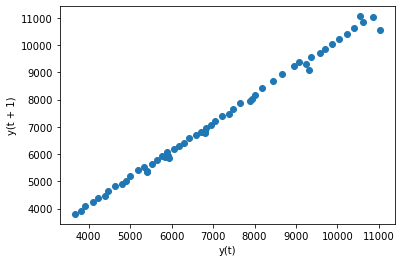

In [343]:
lag_plot(wb_gdp['WLD_gdp_per_capita_constant_us$'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

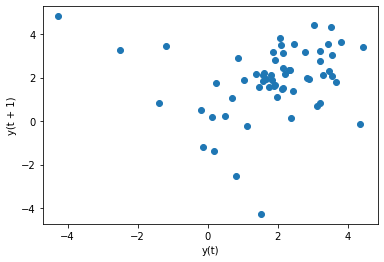

In [344]:
lag_plot(wb_gdp['WLD_gdp_per_capita_constant_%_growth'])

In [345]:
# The GDP per capita in dolars is a fairly good candidate for a time series, the GDP growth not so much
# As a starting point, I will model and analyse based only on WORLD data

### AR Model

In [346]:
train, test = wb_gdp['WLD_gdp_per_capita_constant_us$'][:-5], wb_gdp['WLD_gdp_per_capita_constant_us$'][-5:]
model_AR = AutoReg(train, lags=1)
model_fit_AR = model_AR.fit()

predictions_AR = model_fit_AR.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

observed = wb_gdp['WLD_gdp_per_capita_constant_us$'][-5:].to_list()
predicted_AR = predictions_AR.to_list()
            
forecast_errors = [observed[i]-predicted_AR[i] for i in range(len(observed))]
print('Forecast Errors: %s' % forecast_errors)

mse = mean_squared_error(observed, predicted_AR)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

Forecast Errors: [75.26729614227406, 148.25831816730533, 158.33721413659805, -469.6507846428449, -119.99415999866142]
RMSE: 239.869475


### ARIMA model

In [347]:
model_ARIMA = ARIMA(train, order=(1,1,1))
model_fit_ARIMA = model_ARIMA.fit()
predictions_ARIMA = model_fit_ARIMA.predict(len(wb_gdp['WLD_gdp_per_capita_constant_us$'])-3, len(wb_gdp['WLD_gdp_per_capita_constant_us$'])-1)


observed = wb_gdp['WLD_gdp_per_capita_constant_us$'][-3:].to_list()
predicted_ARIMA = predictions_ARIMA.to_list()
            

forecast_errors = [observed[i]-predicted_ARIMA[i] for i in range(len(observed))]
print('Forecast Errors: %s' % forecast_errors)

mse = mean_squared_error(observed, predicted_ARIMA)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

Forecast Errors: [186.29957775877483, -429.06771177772134, -65.12278623863676]
RMSE: 272.670504


### Models accuracy comparison

In [348]:
pred_AR = pd.DataFrame({'year':wb_gdp['time'][-5:], 'observed':wb_gdp['WLD_gdp_per_capita_constant_us$'][-5:], 'predicted_AR':predicted_AR})
pred_AR['%_error_AR'] = ((pred_AR['observed']-pred_AR['predicted_AR'])/pred_AR['observed'])*100
pred_AR

,year,observed,predicted_AR,%_error_AR
56,YR2017,10625.255930,10549.988634,0.708381
57,YR2018,10853.111494,10704.853176,1.366044
58,YR2019,11019.375428,10861.038214,1.436898
59,YR2020,10548.904223,11018.555008,-4.452129
60,YR2021,11057.420754,11177.414914,-1.085191


In [349]:
pred_ARIMA = pd.DataFrame({'year':wb_gdp['time'][-3:], 'observed':wb_gdp['WLD_gdp_per_capita_constant_us$'][-3:], 'predicted_ARIMA':predictions_ARIMA})
pred_ARIMA['%_error_ARIMA'] = ((pred_ARIMA['observed']-pred_ARIMA['predicted_ARIMA'])/pred_ARIMA['observed'])*100
pred_ARIMA

,year,observed,predicted_ARIMA,%_error_ARIMA
58,YR2019,11019.375428,10833.075850,1.690655
59,YR2020,10548.904223,10977.971935,-4.067415
60,YR2021,11057.420754,11122.543540,-0.588951


This error in the AR model is already quite low, but it was not capable of predicting the fall of GDP in 2020.
This is expected, since time series cannot deal well with schocks such as the pandemic.

The ARIMA model is not that good, but it did predict a fall in GDP in 2020 compared to 2019.
However, the data is probably not stationary enough for a time series. I will check it and try to find better values for p, d and q for ARIMA.

### Improving ARIMA model by checking stationarity of data

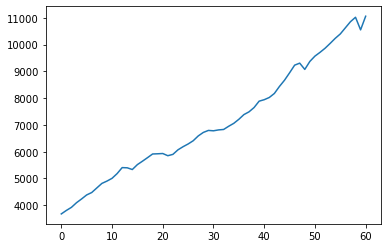

In [350]:
plt.plot(wb_gdp['WLD_gdp_per_capita_constant_us$'])

In [351]:
# There is a very clear growth tendency. We can check it with a more sofisticated plot

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

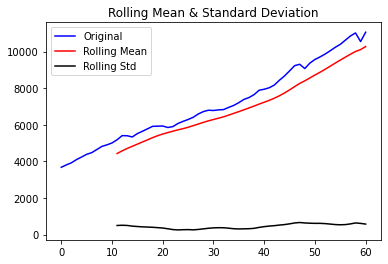

Results of Dickey-Fuller Test:
Test Statistic                  1.679844
p-value                         0.998078
#Lags Used                     11.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


In [353]:
test_stationarity(wb_gdp['WLD_gdp_per_capita_constant_us$'])

#### Finding p

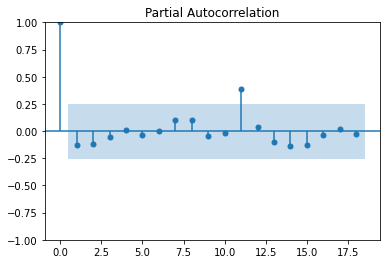

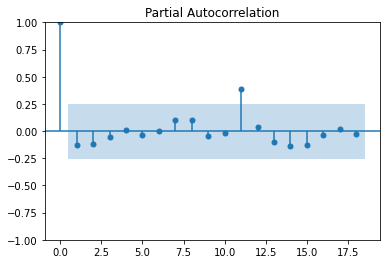

In [354]:
plot_pacf(wb_gdp['WLD_gdp_per_capita_constant_us$'].diff().dropna(), method='ywm')

In [ ]:
# The first lag is already within significance limit, so p=1

#### Finding d

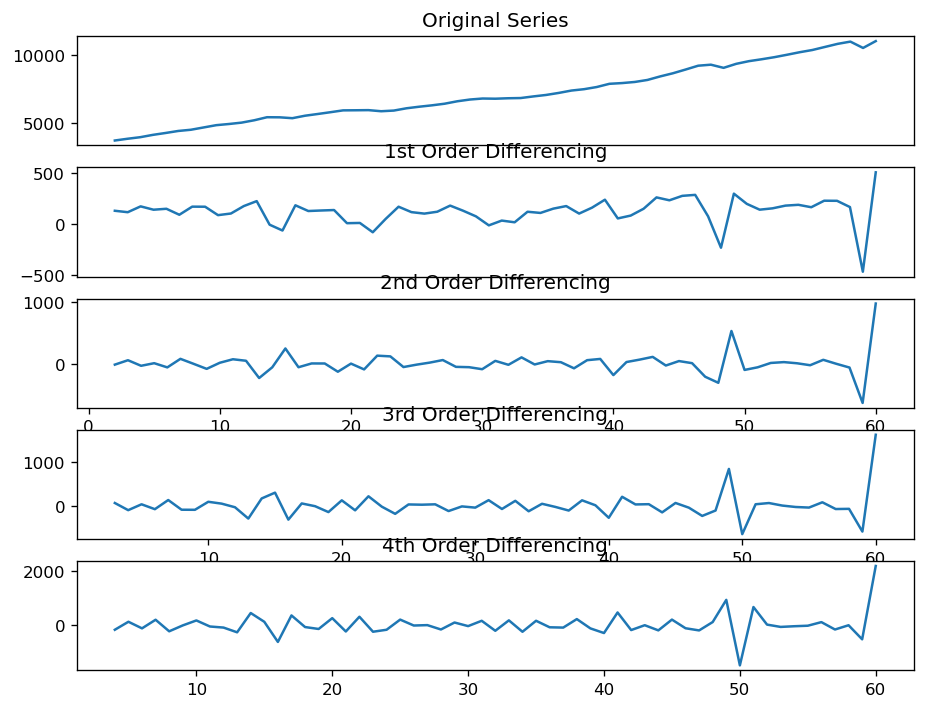

In [355]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5)
ax1.plot(wb_gdp['WLD_gdp_per_capita_constant_us$']); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(wb_gdp['WLD_gdp_per_capita_constant_us$'].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(wb_gdp['WLD_gdp_per_capita_constant_us$'].diff().diff()); ax3.set_title('2nd Order Differencing')
# 3rd Differencing
ax4.plot(wb_gdp['WLD_gdp_per_capita_constant_us$'].diff().diff().diff()); ax4.set_title('3rd Order Differencing')
# 4th Differencing
ax5.plot(wb_gdp['WLD_gdp_per_capita_constant_us$'].diff().diff().diff().diff()); ax5.set_title('4th Order Differencing')
plt.show()

In [ ]:
# There is not much happening after 2nd order, therefore I will choose it as parameter: d=2

#### Finding q

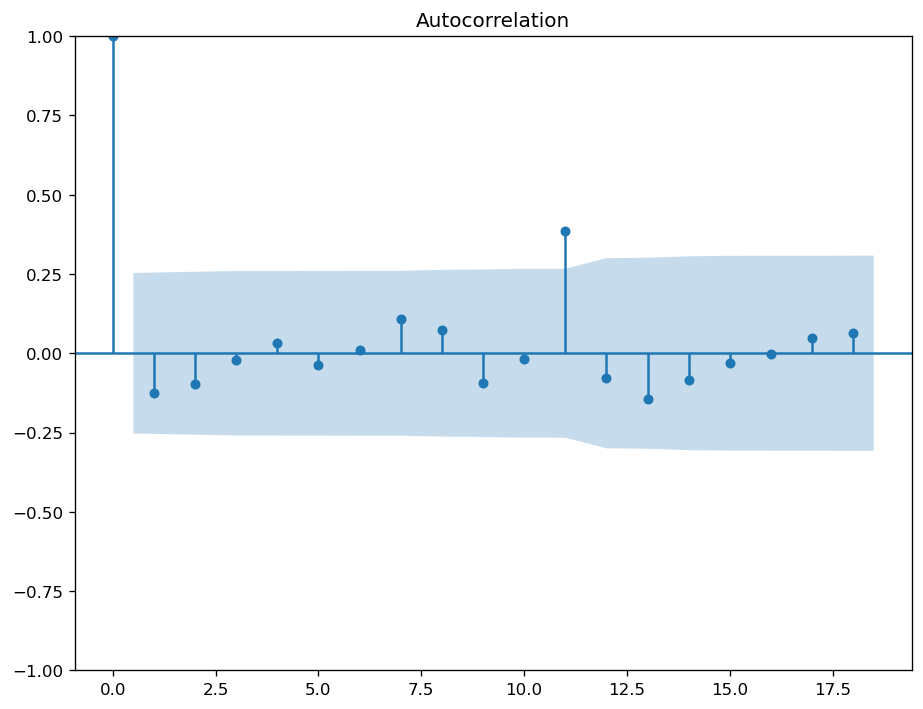

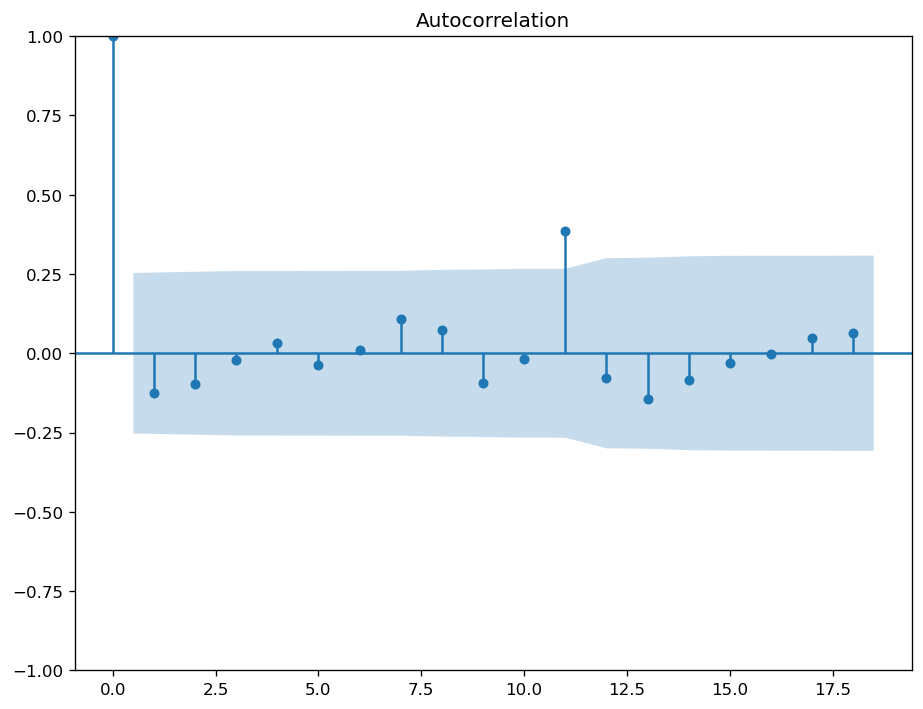

In [356]:
plot_acf(wb_gdp['WLD_gdp_per_capita_constant_us$'].diff().dropna())

In [ ]:
# Also here the first lag is already within significance limit, so q=1

In [358]:
## Applying ARIMA again with improved parameters
model_ARIMA_improv = ARIMA(train, order=(1,2,1))
model_fit_ARIMA_improv = model_ARIMA_improv.fit()
predictions_ARIMA_improv = model_fit_ARIMA_improv.predict(len(wb_gdp['WLD_gdp_per_capita_constant_us$'])-3, len(wb_gdp['WLD_gdp_per_capita_constant_us$'])-1)


observed = wb_gdp['WLD_gdp_per_capita_constant_us$'][-3:].to_list()
predicted_ARIMA_improv = predictions_ARIMA_improv.to_list()
            

forecast_errors = [observed[i]-predicted_ARIMA_improv[i] for i in range(len(observed))]
print('Forecast Errors: %s' % forecast_errors)

mse = mean_squared_error(observed, predicted_ARIMA)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

Forecast Errors: [240.34657864011933, -353.4485240544309, 31.851445727194005]
RMSE: 272.670504


### Comparing Time Series models

In [359]:
# Original ARIMA
pred_ARIMA

,year,observed,predicted_ARIMA,%_error_ARIMA
58,YR2019,11019.375428,10833.075850,1.690655
59,YR2020,10548.904223,10977.971935,-4.067415
60,YR2021,11057.420754,11122.543540,-0.588951


In [360]:
# Improved ARIMA
pred_ARIMA_improv = pd.DataFrame({'year':wb_gdp['time'][-3:],'observed':wb_gdp['WLD_gdp_per_capita_constant_us$'][-3:], 'predicted_ARIMA_improved':predictions_ARIMA_improv})
pred_ARIMA_improv['%_eror_ARIMA_improv'] = ((pred_ARIMA['observed']-pred_ARIMA_improv['predicted_ARIMA_improved'])/pred_ARIMA['observed'])*100
pred_ARIMA_improv

,year,observed,predicted_ARIMA_improved,%_eror_ARIMA_improv
58,YR2019,11019.375428,10779.028849,2.181127
59,YR2020,10548.904223,10902.352747,-3.350571
60,YR2021,11057.420754,11025.569308,0.288055


In [361]:
# AR
pred_AR

,year,observed,predicted_AR,%_error_AR
56,YR2017,10625.255930,10549.988634,0.708381
57,YR2018,10853.111494,10704.853176,1.366044
58,YR2019,11019.375428,10861.038214,1.436898
59,YR2020,10548.904223,11018.555008,-4.452129
60,YR2021,11057.420754,11177.414914,-1.085191


In [ ]:
# Model accuracy has indeed improved!
# However, despite higher accuracy, the new model failed to prodict the fall in GDP between 2019 and 2020

## Regression Models

In this section I am using a series of past observations to predict the next observation.

In [362]:
### Create a dataset which takes a number of datapoints to predict the next one.

def window_input(window_length: int, data: pd.DataFrame):
    df = data.copy()
    df.columns = ['year','gdp']
    
    i = 1
    while i < window_length:
        df[f'x_{i}'] = df['gdp'].shift(-i)
        i = i + 1
        
    if i == window_length:
        df['y'] = df['gdp'].shift(-i)
        
    # Drop rows where there is a NaN
    df = df.dropna(axis=0)
        
    return df

In [363]:
len(wb_gdp)

61

In [364]:
# best result I found was using the last 50 observations
gdp_seq = window_input(50, pd.DataFrame(wb_gdp[['time','WLD_gdp_per_capita_constant_us$']]))
gdp_seq

,year,gdp,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,y
0,YR1961,3676.575517,3806.403544,3922.051459,4095.196204,4235.398820,4384.883315,4475.418941,4645.798899,4815.438894,...,8023.639208,8173.343630,8434.819747,8667.769167,8944.514681,9230.924805,9306.193533,9071.972725,9370.385259,9568.356294
1,YR1962,3806.403544,3922.051459,4095.196204,4235.398820,4384.883315,4475.418941,4645.798899,4815.438894,4902.100198,...,8173.343630,8434.819747,8667.769167,8944.514681,9230.924805,9306.193533,9071.972725,9370.385259,9568.356294,9708.872093
2,YR1963,3922.051459,4095.196204,4235.398820,4384.883315,4475.418941,4645.798899,4815.438894,4902.100198,5004.878976,...,8434.819747,8667.769167,8944.514681,9230.924805,9306.193533,9071.972725,9370.385259,9568.356294,9708.872093,9862.660277
3,YR1964,4095.196204,4235.398820,4384.883315,4475.418941,4645.798899,4815.438894,4902.100198,5004.878976,5180.864546,...,8667.769167,8944.514681,9230.924805,9306.193533,9071.972725,9370.385259,9568.356294,9708.872093,9862.660277,10043.200722
4,YR1965,4235.398820,4384.883315,4475.418941,4645.798899,4815.438894,4902.100198,5004.878976,5180.864546,5405.594257,...,8944.514681,9230.924805,9306.193533,9071.972725,9370.385259,9568.356294,9708.872093,9862.660277,10043.200722,10231.702585
5,YR1966,4384.883315,4475.418941,4645.798899,4815.438894,4902.100198,5004.878976,5180.864546,5405.594257,5398.382474,...,9230.924805,9306.193533,9071.972725,9370.385259,9568.356294,9708.872093,9862.660277,10043.200722,10231.702585,10396.433423
6,YR1967,4475.418941,4645.798899,4815.438894,4902.100198,5004.878976,5180.864546,5405.594257,5398.382474,5333.761314,...,9306.193533,9071.972725,9370.385259,9568.356294,9708.872093,9862.660277,10043.200722,10231.702585,10396.433423,10625.255930
7,YR1968,4645.798899,4815.438894,4902.100198,5004.878976,5180.864546,5405.594257,5398.382474,5333.761314,5517.571215,...,9071.972725,9370.385259,9568.356294,9708.872093,9862.660277,10043.200722,10231.702585,10396.433423,10625.255930,10853.111494
8,YR1969,4815.438894,4902.100198,5004.878976,5180.864546,5405.594257,5398.382474,5333.761314,5517.571215,5644.969010,...,9370.385259,9568.356294,9708.872093,9862.660277,10043.200722,10231.702585,10396.433423,10625.255930,10853.111494,11019.375428
9,YR1970,4902.100198,5004.878976,5180.864546,5405.594257,5398.382474,5333.761314,5517.571215,5644.969010,5777.508041,...,9568.356294,9708.872093,9862.660277,10043.200722,10231.702585,10396.433423,10625.255930,10853.111494,11019.375428,10548.904223


### X-Y split

In [371]:
X = gdp_seq.drop(['year','y'], axis=1)
y = gdp_seq['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

### Creating the models

In [372]:
#  I am using Mean absolute percentage error (MAPE) to compare accuracy

def mape_calculation(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

In [373]:
%%time
import warnings
warnings.filterwarnings('ignore')

model1 = DecisionTreeRegressor(random_state=42)

model2 = LinearRegression()

model3 = KNeighborsRegressor(n_neighbors=5)

model4= RandomForestRegressor(random_state = 42)

model5 = GradientBoostingRegressor(random_state=42)


model_pipeline = [model1, model2, model3, model4, model5]
model_names = ['Decision Tree Regressor', 'Linear Regression', 'KNN', 'Random Forest Regressor', 'Gradient Boost Regressor']
mape = {}

predictions = pd.DataFrame()
predictions['observed']= y_test

for model, model_name in zip(model_pipeline, model_names):
    model.fit(X_train, y_train)
    predictions[f'prediction_{model_name}'] = model.predict(X_test)
    predictions[f'%_error_{model_name}'] = ((predictions['observed']-predictions[f'prediction_{model_name}'])/predictions['observed'])*100

    mape_model = mape_calculation(predictions['observed'], predictions[f'prediction_{model_name}'])
    mape[model_name] = mape_model

print(mape)

{'Decision Tree Regressor': 3.62, 'Linear Regression': 1.95, 'KNN': 5.84, 'Random Forest Regressor': 3.47, 'Gradient Boost Regressor': 2.78}
CPU times: total: 812 ms
Wall time: 237 ms


## Comparing all models

In [368]:
predictions_regression = predictions.reset_index(drop=True)
predictions_regression

,observed,prediction_Decision Tree Regressor,%_error_Decision Tree Regressor,prediction_Linear Regression,%_error_Linear Regression,prediction_KNN,%_error_KNN,prediction_Random Forest Regressor,%_error_Random Forest Regressor,prediction_Gradient Boost Regressor,%_error_Gradient Boost Regressor
0,10853.111494,10396.433423,4.207808,10853.666955,-0.005118,10231.850587,5.724265,10481.324139,3.425629,10575.933772,2.553901
1,11019.375428,10396.433423,5.653152,11007.562744,0.107199,10231.850587,7.146728,10487.747877,4.824480,10583.973939,3.951236
2,10548.904223,10625.255930,-0.723788,11147.548270,-5.674941,10231.850587,3.005560,10493.330718,0.526818,10607.001782,-0.550745
3,11057.420754,10625.255930,3.908369,11277.999768,-1.994851,10231.850587,7.466209,10493.330718,5.101461,10607.204611,4.071620


In [369]:
predictions_timeseries_stats = pd.concat([pred_AR, pred_ARIMA, pred_ARIMA_improv], axis=1).reset_index(drop=True)
predictions_timeseries_stats = predictions_timeseries_stats[2:].reset_index(drop=True)
predictions_timeseries_stats

,year,observed,predicted_AR,%_error_AR,year,observed,predicted_ARIMA,%_error_ARIMA,year,observed,predicted_ARIMA_improved,%_eror_ARIMA_improv
0,YR2019,11019.375428,10861.038214,1.436898,YR2019,11019.375428,10833.075850,1.690655,YR2019,11019.375428,10779.028849,2.181127
1,YR2020,10548.904223,11018.555008,-4.452129,YR2020,10548.904223,10977.971935,-4.067415,YR2020,10548.904223,10902.352747,-3.350571
2,YR2021,11057.420754,11177.414914,-1.085191,YR2021,11057.420754,11122.543540,-0.588951,YR2021,11057.420754,11025.569308,0.288055


In [374]:
mape

{'Decision Tree Regressor': 3.62,
 'Linear Regression': 1.95,
 'KNN': 5.84,
 'Random Forest Regressor': 3.47,
 'Gradient Boost Regressor': 2.78}

In [375]:
mape['AR'] = mape_calculation(pred_AR['observed'], pred_AR['predicted_AR'])
mape['pred_ARIMA']=mape_calculation(pred_ARIMA['observed'], pred_ARIMA['predicted_ARIMA'])
mape['pred_ARIMA_improv']=mape_calculation(pred_ARIMA_improv['observed'], pred_ARIMA_improv['predicted_ARIMA_improved'])

mape

{'Decision Tree Regressor': 3.62,
 'Linear Regression': 1.95,
 'KNN': 5.84,
 'Random Forest Regressor': 3.47,
 'Gradient Boost Regressor': 2.78,
 'AR': 1.81,
 'pred_ARIMA': 2.12,
 'pred_ARIMA_improv': 1.94}

## Conclusions

From 2018 to 2019 there was an increase of GDP, while from 2019 to 2020 there was a decrease.
None of the models was capable of predicting both trends correct, therefore I will go with the model which generated the lowest mean absolute percentage error,which was the AR.

I will use AR this to predict 2022 and 2023 data for all indicators.

## Prediction for 2022 and 2023

In [376]:
wb_gdp = pd.read_csv(r'C:\Users\luana\Ironhack DA\Unit 9\final_bootcamp_project\csv_files\wb_gdp_clean.csv')
wb_gdp

,WLD_gdp_per_capita_constant_us$,WLD_gdp_per_capita_constant_%_growth,ARG_gdp_per_capita_constant_us$,ARG_gdp_per_capita_constant_%_growth,AUS_gdp_per_capita_constant_us$,AUS_gdp_per_capita_constant_%_growth,BRA_gdp_per_capita_constant_us$,CAN_gdp_per_capita_constant_us$,CAN_gdp_per_capita_constant_%_growth,CHN_gdp_per_capita_constant_%_growth,...,KOR_gdp_per_capita_constant_%_growth,TUR_gdp_per_capita_constant_us$,TUR_gdp_per_capita_constant_%_growth,GBR_gdp_per_capita_constant_us$,GBR_gdp_per_capita_constant_%_growth,USA_gdp_per_capita_constant_us$,USA_gdp_per_capita_constant_%_growth,CHN_gdp_per_capita_constant_us$,SAU_gdp_per_capita_%_growth,time
0,3676.575517,2.457848,7637.066652,3.728779,20045.843657,0.464273,2754.246341,13131.899295,1.119387,-26.527644,...,3.809555,2477.795384,-1.268241,15198.153421,1.899262,19253.547329,0.618121,175.023372,1.179570,YR1961
1,3806.403544,3.531222,7451.803394,-2.425843,19815.749592,-1.147839,2851.492888,13847.043915,5.445858,-6.351505,...,0.966642,2553.614058,3.059925,15235.923699,0.248519,20116.235124,4.480669,163.906754,1.179570,YR1962
2,3922.051459,3.038246,6945.957125,-6.788240,20647.485947,4.197350,2786.362446,14318.565243,3.405213,7.622254,...,6.026426,2719.253349,6.486465,15859.449114,4.092469,20701.269947,2.908272,176.400144,1.179570,YR1963
3,4095.196204,4.414647,7532.004475,8.437244,21659.152058,4.899706,2799.641949,14984.486701,4.650755,15.468995,...,6.647770,2800.103587,2.973251,16628.576083,4.849645,21599.818705,4.340549,203.687474,1.179570,YR1964
4,4235.398820,3.423587,8202.112548,8.896809,22509.097404,3.924186,2787.438778,15645.230386,4.409518,14.197889,...,4.624622,2811.423840,0.404280,16876.017357,1.488048,22696.678583,5.078098,232.606796,1.179570,YR1965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,10625.255930,2.200971,13595.037355,1.757648,57695.571259,0.587161,8498.293906,44325.488337,1.811279,6.301863,...,2.870197,11835.261106,5.794264,46746.641890,1.442929,58215.411628,1.610808,9053.212733,-2.713853,YR2017
57,10853.111494,2.144471,13105.397163,-3.601610,58447.252651,1.302841,8582.338637,44917.483728,1.335564,6.251701,...,2.462246,12006.815880,1.449523,47231.336887,1.036855,59600.053098,2.378479,9619.192484,0.684349,YR2018
58,11019.375428,1.531947,12712.970738,-2.994388,58781.046657,0.571103,8622.066599,45109.244486,0.426918,5.575317,...,1.888915,11955.433464,-0.427944,47750.879662,1.099996,60687.232258,1.824124,10155.492945,-1.322726,YR2019
59,10548.904223,-4.269491,11344.405742,-10.765108,58029.515526,-1.278526,8228.774263,42258.691017,-6.319222,1.996619,...,-0.988632,12038.628110,0.695873,43166.155200,-9.601340,58060.313948,-4.328618,10358.259448,-5.639295,YR2020


In [377]:
gdp_columns = []

for column in wb_gdp.columns:
    if 'time' not in column:
        gdp_columns.append(column)

gdp_columns

['WLD_gdp_per_capita_constant_us$',
 'WLD_gdp_per_capita_constant_%_growth',
 'ARG_gdp_per_capita_constant_us$',
 'ARG_gdp_per_capita_constant_%_growth',
 'AUS_gdp_per_capita_constant_us$',
 'AUS_gdp_per_capita_constant_%_growth',
 'BRA_gdp_per_capita_constant_us$',
 'CAN_gdp_per_capita_constant_us$',
 'CAN_gdp_per_capita_constant_%_growth',
 'CHN_gdp_per_capita_constant_%_growth',
 'FRA_gdp_per_capita_constant_us$',
 'FRA_gdp_per_capita_constant_%_growth',
 'DEU_gdp_per_capita_constant_us$',
 'DEU_gdp_per_capita_constant_%_growth',
 'IND_gdp_per_capita_constant_us$',
 'IND_gdp_per_capita_constant_%_growth',
 'IDN_gdp_per_capita_constant_us$',
 'IDN_gdp_per_capita_constant_%_growth',
 'ITA_gdp_per_capita_constant_us$',
 'ITA_gdp_per_capita_constant_%_growth',
 'JPN_gdp_per_capita_constant_us$',
 'JPN_gdp_per_capita_constant_%_growth',
 'MEX_gdp_per_capita_constant_us$',
 'MEX_gdp_per_capita_constant_%_growth',
 'RUS_gdp_per_capita_constant_us$',
 'RUS_gdp_per_capita_constant_%_growth',

In [378]:
# Model for 2022
year_2022 = {'time':'YR2022'}

for i in range(len(gdp_columns)):
    train = wb_gdp[gdp_columns[i]]
    model_AR = AutoReg(train, lags=1)
    model_fit_AR = model_AR.fit()
    year_2022[gdp_columns[i]]= model_fit_AR.predict(start=len(train), end=len(train), dynamic=False).reset_index(drop=True)[0]

wb_gdp = wb_gdp.append(year_2022, ignore_index = True)

    
# Model for 2023
year_2023 = {'time':'YR2023'}    

for i in range(len(gdp_columns)):
    train = wb_gdp[gdp_columns[i]]
    model_AR = AutoReg(train, lags=1)
    model_fit_AR = model_AR.fit()
    year_2023[gdp_columns[i]]= model_fit_AR.predict(start=len(train), end=len(train), dynamic=False).reset_index(drop=True)[0]
    
wb_gdp = wb_gdp.append(year_2023, ignore_index = True)

In [379]:
# Export predictions for GDPs
wb_gdp.to_csv(r'C:\Users\luana\Ironhack DA\Unit 9\final_bootcamp_project\csv_files\wb_gdp_predictions.csv', index=False)
wb_gdp

,WLD_gdp_per_capita_constant_us$,WLD_gdp_per_capita_constant_%_growth,ARG_gdp_per_capita_constant_us$,ARG_gdp_per_capita_constant_%_growth,AUS_gdp_per_capita_constant_us$,AUS_gdp_per_capita_constant_%_growth,BRA_gdp_per_capita_constant_us$,CAN_gdp_per_capita_constant_us$,CAN_gdp_per_capita_constant_%_growth,CHN_gdp_per_capita_constant_%_growth,...,KOR_gdp_per_capita_constant_%_growth,TUR_gdp_per_capita_constant_us$,TUR_gdp_per_capita_constant_%_growth,GBR_gdp_per_capita_constant_us$,GBR_gdp_per_capita_constant_%_growth,USA_gdp_per_capita_constant_us$,USA_gdp_per_capita_constant_%_growth,CHN_gdp_per_capita_constant_us$,SAU_gdp_per_capita_%_growth,time
0,3676.575517,2.457848,7637.066652,3.728779,20045.843657,0.464273,2754.246341,13131.899295,1.119387,-26.527644,...,3.809555,2477.795384,-1.268241,15198.153421,1.899262,19253.547329,0.618121,175.023372,1.179570,YR1961
1,3806.403544,3.531222,7451.803394,-2.425843,19815.749592,-1.147839,2851.492888,13847.043915,5.445858,-6.351505,...,0.966642,2553.614058,3.059925,15235.923699,0.248519,20116.235124,4.480669,163.906754,1.179570,YR1962
2,3922.051459,3.038246,6945.957125,-6.788240,20647.485947,4.197350,2786.362446,14318.565243,3.405213,7.622254,...,6.026426,2719.253349,6.486465,15859.449114,4.092469,20701.269947,2.908272,176.400144,1.179570,YR1963
3,4095.196204,4.414647,7532.004475,8.437244,21659.152058,4.899706,2799.641949,14984.486701,4.650755,15.468995,...,6.647770,2800.103587,2.973251,16628.576083,4.849645,21599.818705,4.340549,203.687474,1.179570,YR1964
4,4235.398820,3.423587,8202.112548,8.896809,22509.097404,3.924186,2787.438778,15645.230386,4.409518,14.197889,...,4.624622,2811.423840,0.404280,16876.017357,1.488048,22696.678583,5.078098,232.606796,1.179570,YR1965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,11019.375428,1.531947,12712.970738,-2.994388,58781.046657,0.571103,8622.066599,45109.244486,0.426918,5.575317,...,1.888915,11955.433464,-0.427944,47750.879662,1.099996,60687.232258,1.824124,10155.492945,-1.322726,YR2019
59,10548.904223,-4.269491,11344.405742,-10.765108,58029.515526,-1.278526,8228.774263,42258.691017,-6.319222,1.996619,...,-0.988632,12038.628110,0.695873,43166.155200,-9.601340,58060.313948,-4.328618,10358.259448,-5.639295,YR2020
60,11057.420754,4.820563,12390.808688,9.223956,58780.333061,1.293855,8551.205336,43945.556990,3.991761,8.013345,...,4.204823,13250.658911,10.067848,46209.105175,7.049388,61280.389602,5.546087,11188.302540,1.701948,YR2021
61,11203.033754,2.270873,12361.024482,1.667638,59435.221629,1.724197,8592.317906,44377.128153,2.401821,7.775952,...,5.305532,13699.764379,2.782035,46588.665559,2.332662,61942.943201,2.538427,11916.306804,1.337818,YR2022


In [380]:
# And I can do the same for the other World Bank Data set which has more indicators but data starting in 1981.

wb_1981 = pd.read_csv(r'C:\Users\luana\Ironhack DA\Unit 9\final_bootcamp_project\csv_files\wb_from_1981_clean.csv')
wb_1981

,time,WLD_gdp_per_capita_constant_us$,WLD_gdp_per_capita_constant_%_growth,WLD_consumer_price_index_%,WLD_unemployment_%_of_total_labor_force,ARG_gdp_per_capita_constant_us$,ARG_gdp_per_capita_constant_%_growth,ARG_unemployment_%_of_total_labor_force,ARG_current_account_balance_us$,ARG_industry_value_added_%_growth,...,USA_unemployment_%_of_total_labor_force,USA_government_debt_total_local_currency,USA_government_debt_total_%_of_gdp,USA_government_expense_local_currency,USA_government_expense_%_gdp,USA_current_account_balance_us$,USA_industry_value_added_us$,USA_net_trade_goods_services_us$,CHN_gdp_per_capita_constant_us$,SAU_gdp_per_capita_%_growth
0,YR1982,5849.893784,-1.381191,10.240268,5.697886,9407.874641,-2.307766,10.977871,-2.353000e+09,-3.209381,...,5.913032,9.779907e+12,67.388391,7.511200e+11,22.463140,-1.160700e+10,22.463140,-2.353700e+10,480.310474,-25.614130
1,YR1983,5899.646053,0.850482,8.771147,5.697886,9660.192130,2.681982,10.977871,-2.436000e+09,5.377688,...,5.913032,9.779907e+12,67.388391,8.286600e+11,22.802733,-4.422200e+10,22.802733,-5.713500e+10,524.408437,-21.161576
2,YR1984,6069.455639,2.878301,8.116398,5.697886,9655.183649,-0.051847,10.977871,-2.495000e+09,0.674286,...,5.913032,9.779907e+12,67.388391,8.668900e+11,21.470359,-9.900800e+10,21.470359,-1.082770e+11,596.200056,-10.171216
3,YR1985,6185.809777,1.917044,6.856812,5.697886,9009.001729,-6.692591,10.977871,-9.520000e+08,-8.651012,...,5.913032,9.779907e+12,67.388391,9.621600e+11,22.174802,-1.244550e+11,22.174802,-1.211020e+11,667.127364,-14.608777
4,YR1986,6287.644923,1.646270,5.822667,5.697886,9412.994813,4.484327,10.977871,-2.859000e+09,8.630264,...,5.913032,9.779907e+12,67.388391,1.018080e+12,22.230612,-1.471740e+11,22.230612,-1.385270e+11,716.104075,11.285443
5,YR1987,6408.014120,1.914377,5.756464,5.697886,9517.108610,1.106065,10.977871,-4.235000e+09,3.356777,...,5.913032,9.779907e+12,67.388391,1.037770e+12,21.374337,-1.606470e+11,21.374337,-1.516750e+11,786.863492,-10.843348
6,YR1988,6588.724473,2.820068,7.146098,5.697886,9269.355791,-2.603236,10.977871,-1.572000e+09,-3.551976,...,5.913032,9.779907e+12,67.388391,1.101240e+12,21.030326,-1.212580e+11,21.030326,-1.146600e+11,861.191965,8.422702
7,YR1989,6719.220870,1.980602,6.999093,5.697886,8477.672903,-8.540862,10.977871,-1.305000e+09,-8.588761,...,5.913032,2.207460e+12,39.128400,1.177010e+12,20.863127,-9.950600e+10,20.863127,-9.312600e+10,883.762594,-4.289541
8,YR1990,6794.010559,1.113071,8.127416,5.697886,8149.240619,-3.874085,10.977871,4.552000e+09,-5.325308,...,5.913032,2.440950e+12,40.933944,1.285590e+12,21.558929,-7.895200e+10,21.558929,-8.085200e+10,905.030859,11.166520
9,YR1991,6780.122574,-0.204415,8.998469,4.799869,8769.750400,7.614326,5.440000,-6.470000e+08,10.687460,...,6.800000,2.713370e+12,44.061597,1.409250e+12,22.884386,2.851000e+09,22.884386,-3.118000e+10,975.461193,11.312661


In [382]:
prediction_columns = []

for column in wb_1981.columns:
    if 'time' not in column:
        prediction_columns.append(column)

In [383]:
# Model for 2022
year_2022 = {'time':'YR2022'}

for i in range(len(prediction_columns)):
    train = wb_1981[prediction_columns[i]]
    model_AR = AutoReg(train, lags=1)
    model_fit_AR = model_AR.fit()
    year_2022[prediction_columns[i]]= model_fit_AR.predict(start=len(train), end=len(train), dynamic=False).reset_index(drop=True)[0]

wb_1981 = wb_1981.append(year_2022, ignore_index = True)

    
# Model for 2023
year_2023 = {'time':'YR2023'}    

for i in range(len(prediction_columns)):
    train = wb_1981[prediction_columns[i]]
    model_AR = AutoReg(train, lags=1)
    model_fit_AR = model_AR.fit()
    year_2023[prediction_columns[i]]= model_fit_AR.predict(start=len(train), end=len(train), dynamic=False).reset_index(drop=True)[0]
    
wb_1981 = wb_1981.append(year_2023, ignore_index = True)

In [384]:
# Exporting
wb_1981.to_csv(r'C:\Users\luana\Ironhack DA\Unit 9\final_bootcamp_project\csv_files\wb_from_1981_predictions.csv', index=False)
wb_1981

,time,WLD_gdp_per_capita_constant_us$,WLD_gdp_per_capita_constant_%_growth,WLD_consumer_price_index_%,WLD_unemployment_%_of_total_labor_force,ARG_gdp_per_capita_constant_us$,ARG_gdp_per_capita_constant_%_growth,ARG_unemployment_%_of_total_labor_force,ARG_current_account_balance_us$,ARG_industry_value_added_%_growth,...,USA_unemployment_%_of_total_labor_force,USA_government_debt_total_local_currency,USA_government_debt_total_%_of_gdp,USA_government_expense_local_currency,USA_government_expense_%_gdp,USA_current_account_balance_us$,USA_industry_value_added_us$,USA_net_trade_goods_services_us$,CHN_gdp_per_capita_constant_us$,SAU_gdp_per_capita_%_growth
0,YR1982,5849.893784,-1.381191,10.240268,5.697886,9407.874641,-2.307766,10.977871,-2.353000e+09,-3.209381,...,5.913032,9.779907e+12,67.388391,7.511200e+11,22.463140,-1.160700e+10,22.463140,-2.353700e+10,480.310474,-25.614130
1,YR1983,5899.646053,0.850482,8.771147,5.697886,9660.192130,2.681982,10.977871,-2.436000e+09,5.377688,...,5.913032,9.779907e+12,67.388391,8.286600e+11,22.802733,-4.422200e+10,22.802733,-5.713500e+10,524.408437,-21.161576
2,YR1984,6069.455639,2.878301,8.116398,5.697886,9655.183649,-0.051847,10.977871,-2.495000e+09,0.674286,...,5.913032,9.779907e+12,67.388391,8.668900e+11,21.470359,-9.900800e+10,21.470359,-1.082770e+11,596.200056,-10.171216
3,YR1985,6185.809777,1.917044,6.856812,5.697886,9009.001729,-6.692591,10.977871,-9.520000e+08,-8.651012,...,5.913032,9.779907e+12,67.388391,9.621600e+11,22.174802,-1.244550e+11,22.174802,-1.211020e+11,667.127364,-14.608777
4,YR1986,6287.644923,1.646270,5.822667,5.697886,9412.994813,4.484327,10.977871,-2.859000e+09,8.630264,...,5.913032,9.779907e+12,67.388391,1.018080e+12,22.230612,-1.471740e+11,22.230612,-1.385270e+11,716.104075,11.285443
5,YR1987,6408.014120,1.914377,5.756464,5.697886,9517.108610,1.106065,10.977871,-4.235000e+09,3.356777,...,5.913032,9.779907e+12,67.388391,1.037770e+12,21.374337,-1.606470e+11,21.374337,-1.516750e+11,786.863492,-10.843348
6,YR1988,6588.724473,2.820068,7.146098,5.697886,9269.355791,-2.603236,10.977871,-1.572000e+09,-3.551976,...,5.913032,9.779907e+12,67.388391,1.101240e+12,21.030326,-1.212580e+11,21.030326,-1.146600e+11,861.191965,8.422702
7,YR1989,6719.220870,1.980602,6.999093,5.697886,8477.672903,-8.540862,10.977871,-1.305000e+09,-8.588761,...,5.913032,2.207460e+12,39.128400,1.177010e+12,20.863127,-9.950600e+10,20.863127,-9.312600e+10,883.762594,-4.289541
8,YR1990,6794.010559,1.113071,8.127416,5.697886,8149.240619,-3.874085,10.977871,4.552000e+09,-5.325308,...,5.913032,2.440950e+12,40.933944,1.285590e+12,21.558929,-7.895200e+10,21.558929,-8.085200e+10,905.030859,11.166520
9,YR1991,6780.122574,-0.204415,8.998469,4.799869,8769.750400,7.614326,5.440000,-6.470000e+08,10.687460,...,6.800000,2.713370e+12,44.061597,1.409250e+12,22.884386,2.851000e+09,22.884386,-3.118000e+10,975.461193,11.312661
